<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [14]:
# write your code here
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

#### Load the csv file and print the first five observations.

In [2]:
# write your code here
df_earthquake=pd.read_csv('Earthquake_Data.csv')
df_earthquake.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# write your code here
df_earthquake.shape

(1647, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# write your code here
df_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     1647 non-null   float64
 1   Longitude    1647 non-null   float64
 2   DepthMeters  1647 non-null   int64  
 3   Magnitude    1647 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 51.6 KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# write your code here
df_earthquake.isnull().sum()

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# write your code here
df_earthquake.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


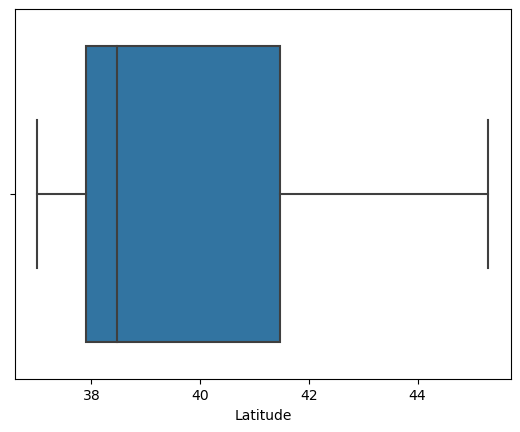

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


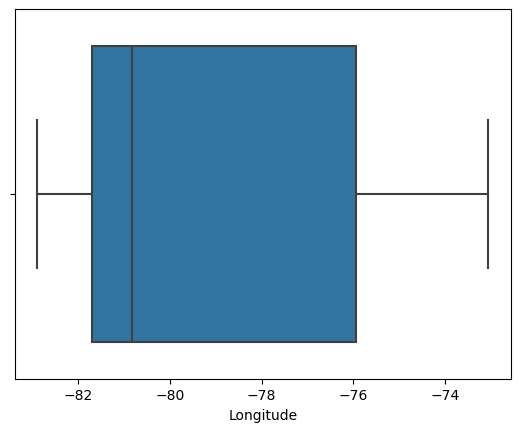

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


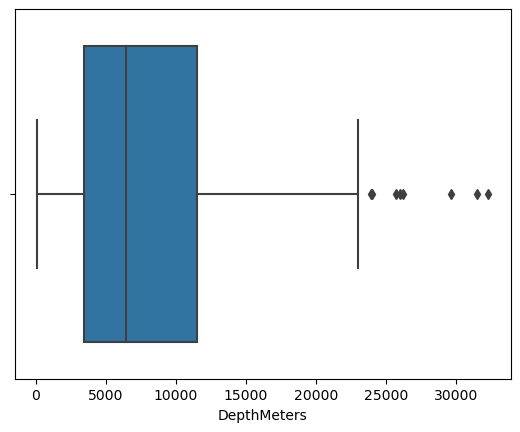

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


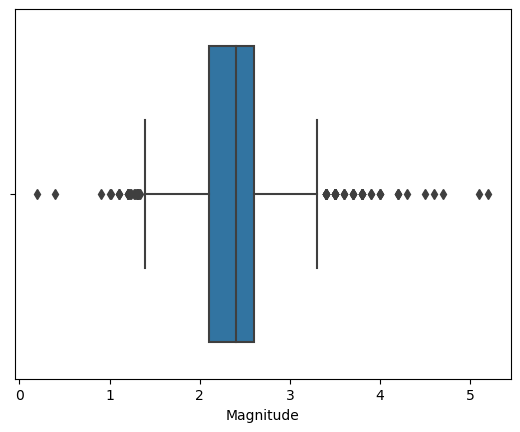

In [13]:
# write your code here
for i in df_earthquake:
    sns.boxplot(df_earthquake[i]) 
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# write your code here
q1 = df_earthquake.quantile(0.25)
q3 = df_earthquake.quantile(0.75)

iqr = q3 - q1
  
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)

df_earthquake = df_earthquake[~((df_earthquake < (q1 - 1.5 * iqr)) | (df_earthquake > (q3 + 1.5 * iqr))).any(axis=1)]

In [16]:
df_earthquake.shape

(1562, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# write your code here
df_new=df_earthquake.drop(['Latitude','Longitude'],axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# write your code here
sc=StandardScaler()
scaled_data = sc.fit_transform(df_new)
scaled_data

array([[-0.48890768,  1.25239414],
       [ 0.80353035,  1.25239414],
       [ 2.09596838, -0.73501951],
       ...,
       [-0.86669725, -0.73501951],
       [ 1.89713176, -0.45110327],
       [ 2.27492133, -0.45110327]])

<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# write your code here
cluster_range=range(1,7)
wcss=[]
cluster_sil_score=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(scaled_data)     # cluster or centroid form
    wcss.append(kmeans.inertia_)
wcss   

C:\Users\jainh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[3124.0,
 1943.582211951909,
 1257.9770800049268,
 964.2748832142154,
 790.5899314514639,
 672.9668280738208,
 586.4999077622302]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Text(0, 0.5, 'WCSS')

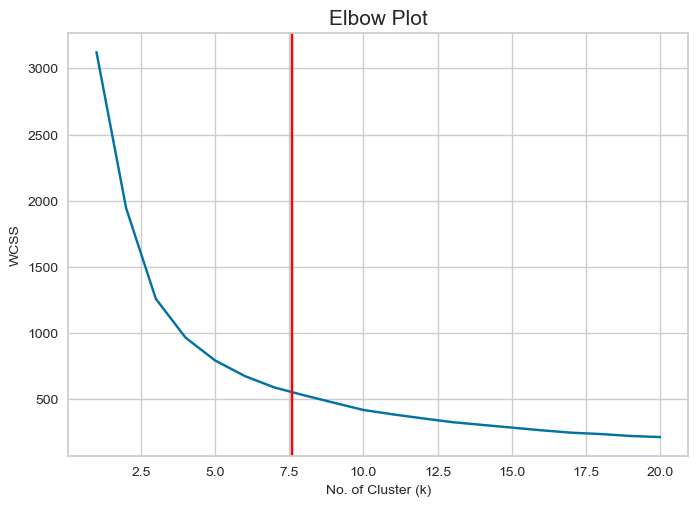

In [24]:
# write your code here
plt.plot(range(1,21),wcss)
plt.axvline(x=7.6,color='red')
plt.title('Elbow Plot', fontsize=15)
plt.xlabel('No. of Cluster (k)', fontsize=10)
plt.ylabel('WCSS',fontsize=10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# write your code here
silhouette_coefficients = []

for k in range(2,8):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data,kmeans.labels_,random_state=10)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.3743704735416158, 0.39268003903375004, 0.3675083071920705, 0.3448574750320023, 0.3458336784043734, 0.34742781068930273]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

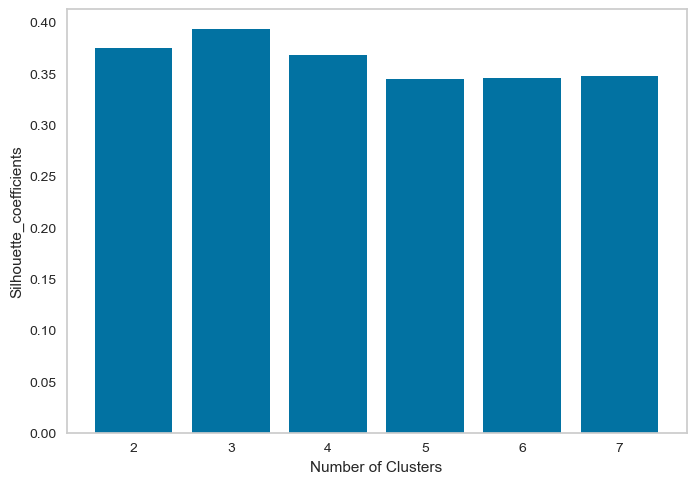

In [26]:
# write your code here
plt.bar(range(2,8),silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette_coefficients')
plt.grid()
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

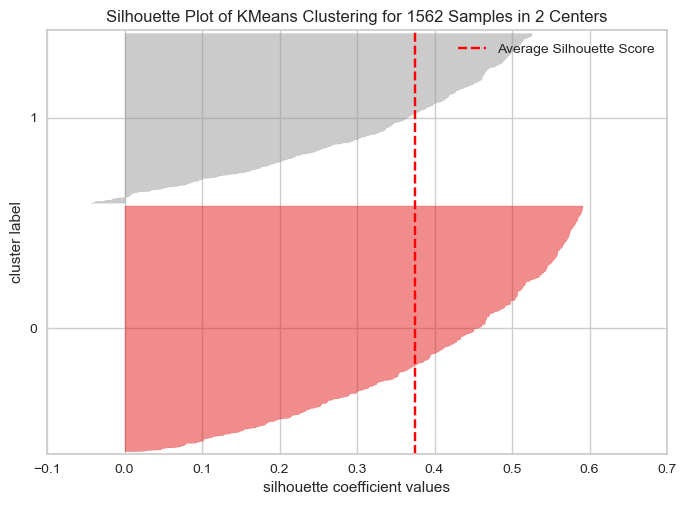

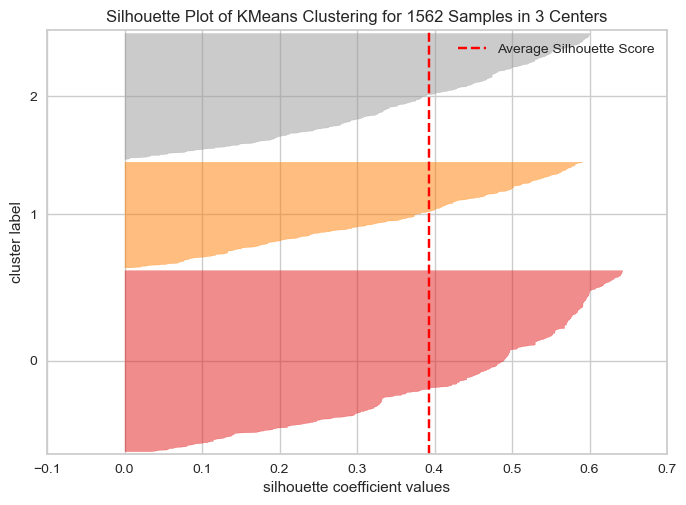

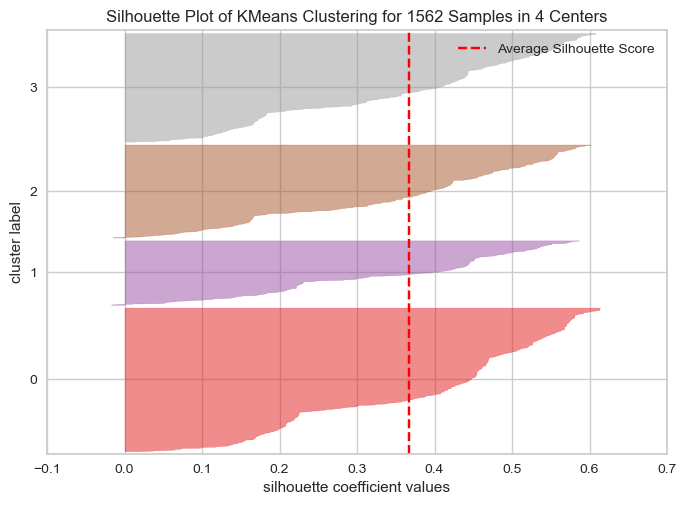

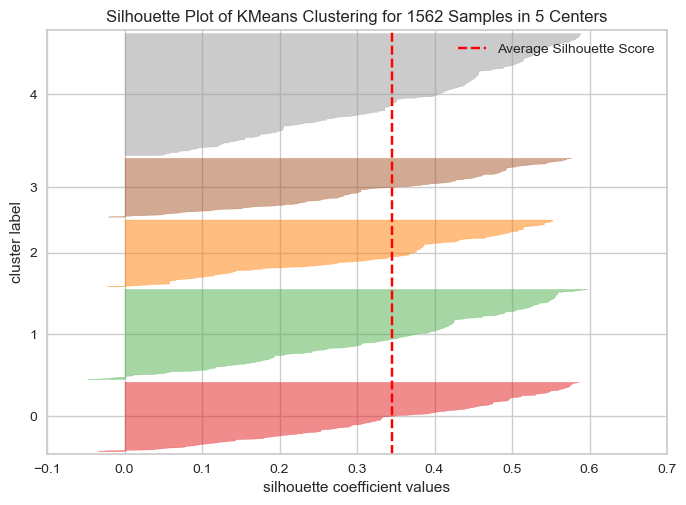

In [35]:
# write your code here
for i in range(2,6):
    kms=KMeans(n_clusters=i)
    kms.fit(scaled_data)
    model= KMeans(n_clusters=i,random_state=10)
    visualizer= SilhouetteVisualizer(model)
    visualizer.fit(scaled_data)
    visualizer.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# write your code here

#Instantiate the algorithm
kmns=KMeans(n_clusters=3,random_state=15,max_iter=200,tol=0.001)   ## Change the n_clusters to 3
#fit the model
kmns.fit(scaled_data)

# as per the procedure, we do fit and then predict
# fit means we have build the model

KMeans(max_iter=200, n_clusters=3, random_state=15, tol=0.001)

<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# write your code here
labels=kmeans.labels_
labels=pd.DataFrame(labels,columns=['cluster'])
label_count=labels.value_counts()
label_count

cluster
0          295
3          290
5          273
1          236
6          189
2          179
4          100
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

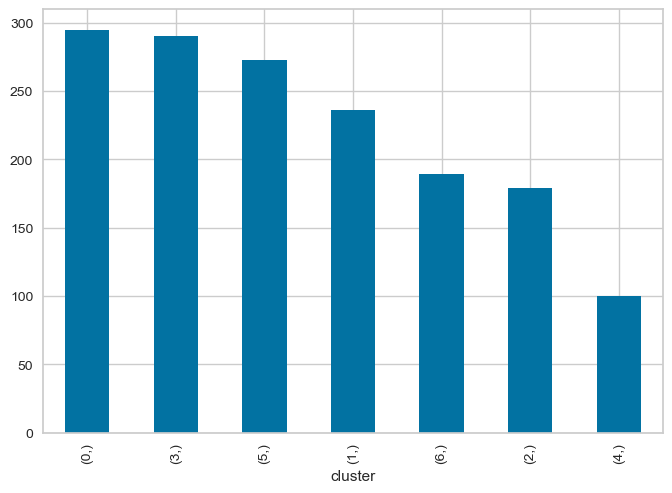

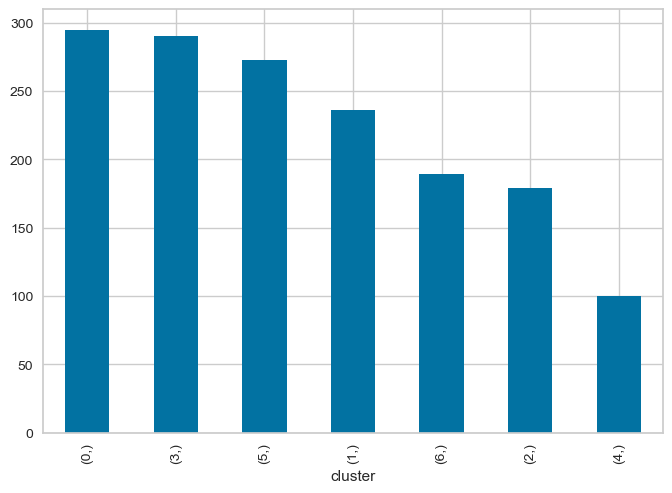

In [39]:
# write your code here
# write your code here
labels.value_counts().plot(kind='bar')
plt.show()

labels.value_counts().plot(kind='bar')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# write your code here
centroids=kmeans.cluster_centers_
centroids=pd.DataFrame(centroids,columns=df_new.columns)
centroids

,DepthMeters,Magnitude
0,-1.105220,0.159750
1,1.274136,-0.396716
2,1.222865,0.959754
3,-0.045063,0.292268
4,0.962318,-1.809599
5,-0.524946,-1.091631
6,-0.707481,1.415383


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# write your code here
cluster_0=df_earthquake[kmeans.labels_==0]
cluster_0.head()

cluster_0.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,295.000000,295.000000,295.000000,295.000000
mean,38.354207,-81.045559,1900.406780,2.415153
std,1.349568,1.850950,1276.776275,0.133365
min,37.188500,-82.616800,100.000000,2.100000
25%,37.742400,-82.033450,700.000000,2.300000
50%,37.903200,-81.666400,1800.000000,2.400000
75%,38.114250,-81.336800,3000.000000,2.500000
max,44.815000,-73.677000,4800.000000,2.600000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# write your code here
cluster_1=df_earthquake[kmeans.labels_==1]
cluster_1.head()

cluster_1.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,236.000000,236.000000,236.000000,236.000000
mean,40.940167,-77.799847,13878.516949,2.220085
std,2.441960,3.224121,2698.756830,0.134705
min,37.179900,-82.528600,9300.000000,1.900000
25%,38.103275,-81.290175,11900.000000,2.100000
50%,41.110900,-77.377600,13400.000000,2.200000
75%,42.982600,-74.241667,14900.000000,2.300000
max,45.296000,-73.475000,23000.000000,2.400000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# write your code here
cluster_2=df_earthquake[kmeans.labels_==2]
cluster_2.head()

cluster_2.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,179.000000,179.000000,179.000000,179.000000
mean,39.701910,-79.419108,13608.938547,2.696927
std,2.540701,3.105067,2530.072720,0.195178
min,37.050000,-82.435200,8900.000000,2.500000
25%,37.916200,-81.633200,11700.000000,2.500000
50%,38.242900,-81.061100,13400.000000,2.700000
75%,41.454200,-77.353050,14900.000000,2.800000
max,45.223000,-73.208000,22100.000000,3.300000
